In [10]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

KFRAMES = 5
TOPPRED = 3
SAMPLE = ('Random Sampling', 'Head Sampling', 'Proportion Sampling')
SAMPLEINDEX = 0

In [3]:
model = ResNet50(weights='imagenet')

## 2. Use loaded model to predict (Sample)

In [4]:
# img_path = 'image19.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# preds = model.predict(x)
# # decode the results into a list of tuples (class, description, probability)
# # (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=3)[0])

In [5]:
# res = decode_predictions(preds, top=3)[0]
# print(res[0][1])
    
# # predset = dict([(res[0][1],res[0][2]), (res[1][1],res[1][2]), (res[2][1],res[2][2])])
# # predset['null'] += 0.67
# # predset

## 3. Play around with directory to get number of frames inside the folder

In [6]:
import os, os.path

# simple version for working with CWD
# print (len([name for name in os.listdir('./frames/') if os.path.isfile(name)]))

DIR = '/datasets/ee285s-public/YoutubeFrames/Bicycle1/frames'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1075


## 4. Extract 5 frames for prediction (Random Selection, First Selection, or Quantile Selection)

In [7]:
import random

def getRandomImagesIndex(path, number):
    IMAGE_PATHS = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            IMAGE_PATHS.append(os.path.join(path, file))
    
    totalImage = len(IMAGE_PATHS)
    random_index = random.sample(range(totalImage), number)
    return IMAGE_PATHS, random_index

def getFirstImagesIndex(path, number):
    IMAGE_PATHS = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            IMAGE_PATHS.append(os.path.join(path, file))
    
    totalImage = len(IMAGE_PATHS)
    random_index = np.arange(0,number)
    SAMPLEINDEX = 1
    return IMAGE_PATHS, random_index

def getPropImagesIndex(path, number):
    IMAGE_PATHS = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            IMAGE_PATHS.append(os.path.join(path, file))
    
    totalImage = len(IMAGE_PATHS)
    step = int(totalImage / number - 1)
    random_index = np.zeros(number)
    for i in range(number):
        random_index[i] = int(step * (i+1))
    random_index = random_index.astype(int)
    SAMPLEINDEX = 2
    return IMAGE_PATHS, random_index

In [8]:
impath, imindex = getPropImagesIndex(DIR, 5)
print(imindex)

imgall = []
predset = dict()

for index in imindex:
    tempimg = image.load_img(impath[index], target_size=(224, 224))
    tempx = image.img_to_array(tempimg)
    tempx = np.expand_dims(tempx, axis=0)
    tempx = preprocess_input(tempx)
    
    temppreds = model.predict(tempx)
    tempres = decode_predictions(temppreds, top=3)[0]
    
    for i in range(3):
        if tempres[i][1] in predset:
            predset[tempres[i][1]] += tempres[i][2]
        else:
            predset[tempres[i][1]] = tempres[i][2]
            


[ 214  428  642  856 1070]


## 5. Plot the final result

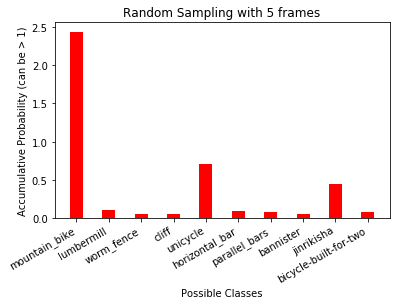

Final Prediction of the video label:  mountain_bike


In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.bar(predset.keys(), predset.values(), color='r', width = 0.4)
plt.xlabel('Possible Classes')
plt.ylabel('Accumulative Probability (can be > 1)')
plt.title(SAMPLE[SAMPLEINDEX] + ' with '+ str(KFRAMES) + ' frames') 
#          ' with frame number: ', KFRAMES)
plt.show()

sortpred = sorted(predset.items(), key=lambda x: x[1])

finallabel = sortpred[-1][0]

print('Final Prediction of the video label: ',finallabel)